In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
df=pd.read_csv('Churn Modeling.csv')

In [71]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [72]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [73]:
#Drop Feature Id
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [74]:
df_c=df.copy()
print(df_c)

      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0   

In [75]:
#Change the data type of Age feature
df['Age']=df['Age'].astype(int)

In [76]:
df.shape[0]

10000

In [77]:
len(df[df.duplicated()])

0

In [78]:
duplicate_rows = df[df.duplicated()]

In [79]:
df=df.drop(duplicate_rows.index)

In [80]:
df.shape

(10000, 11)

In [81]:
#Creating a copy of data frame 
df_org=df.copy()

In [82]:
df_org.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [83]:
df['Gender']=df['Gender'].map({'Female':0,'Male':1})
df_x=df_c.copy()
df_c['Gender']=df_c['Gender'].map({'Female':0,'Male':1})

In [84]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [85]:
df['Geography']=df['Geography'].map({'France':0,'Spain':1,'Germany':2})
df_c['Geography']=df_c['Geography'].map({'France':0,'Spain':1,'Germany':2})

In [86]:
df.isnull().values.any()

np.False_

In [87]:
#percentage of customer churn
churned=df['Exited'].value_counts()[1]/df.shape[0]*100
print('Churned rate is {:.2f}%'.format(churned))

Churned rate is 20.37%


In [88]:
#Show inbalance dataset
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

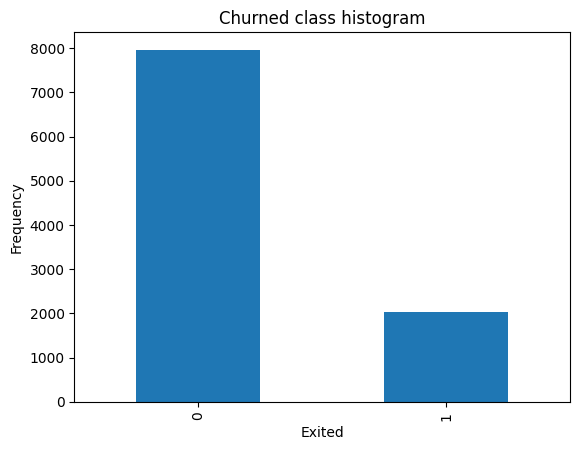

In [89]:
# Compare different class in the dataset
classes = df['Exited'].value_counts()
classes.plot( kind='bar')
plt.title("Churned class histogram")
plt.xlabel("Exited")
plt.ylabel("Frequency")

<Axes: >

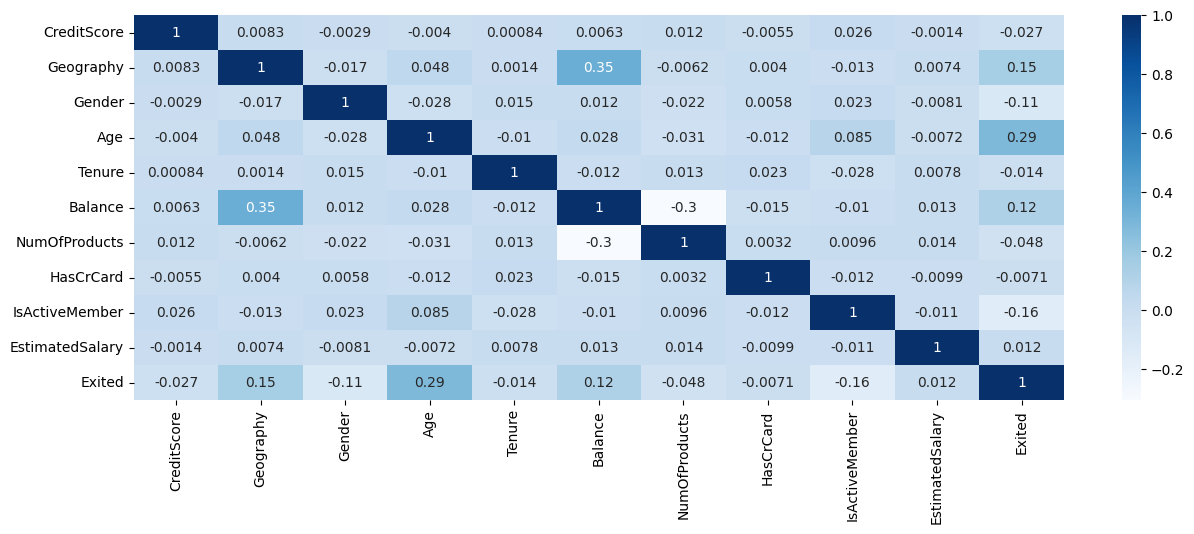

In [90]:
#Correlation
fig = plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True,cmap="Blues")

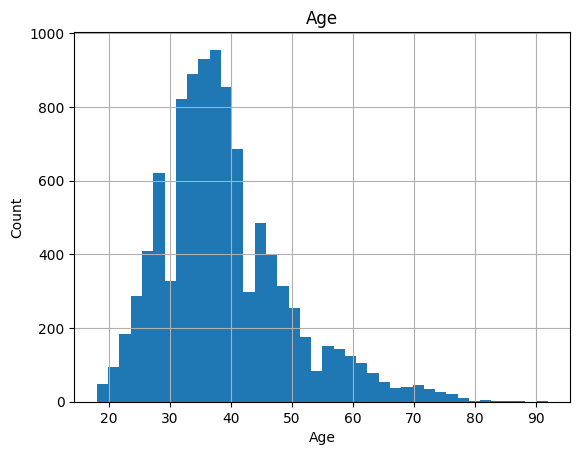

In [91]:
df['Age'].hist(bins=40)
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

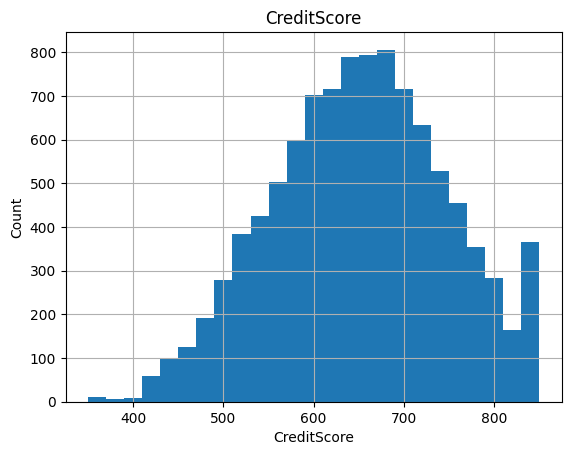

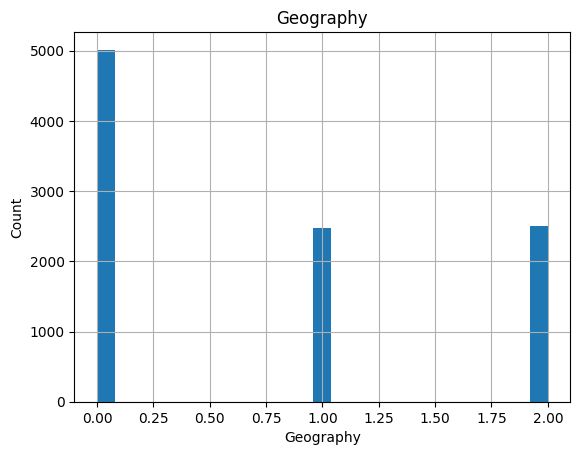

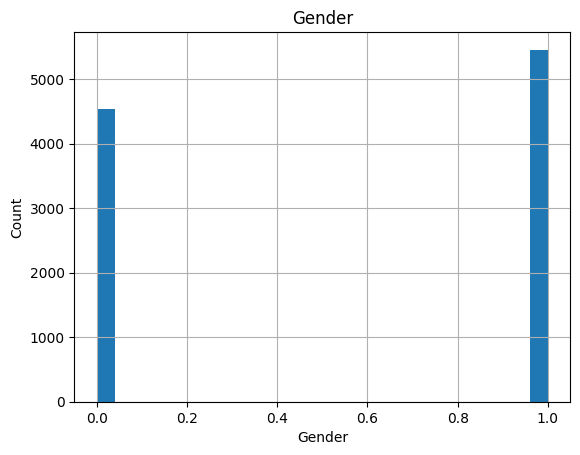

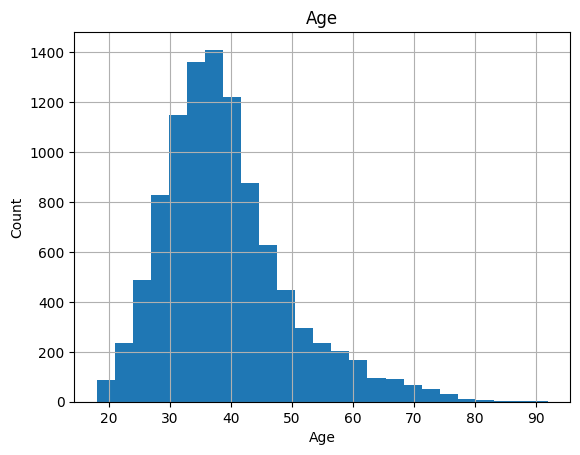

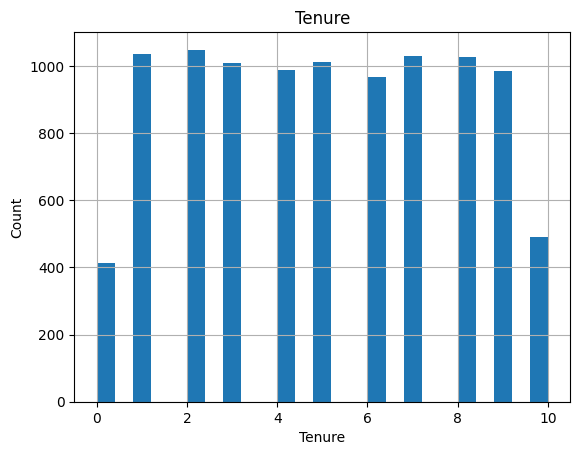

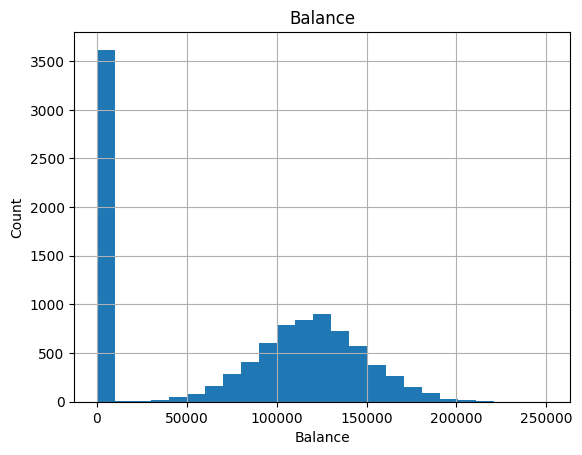

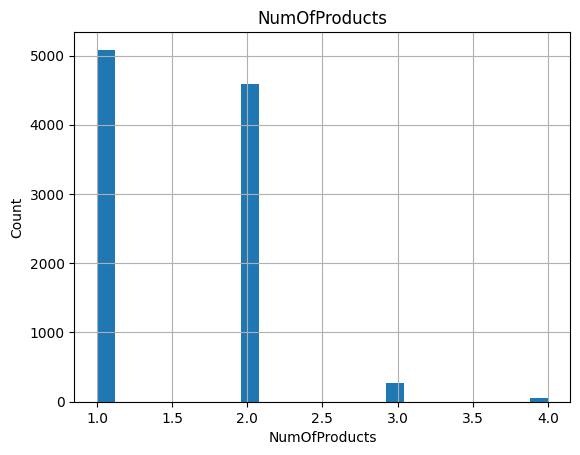

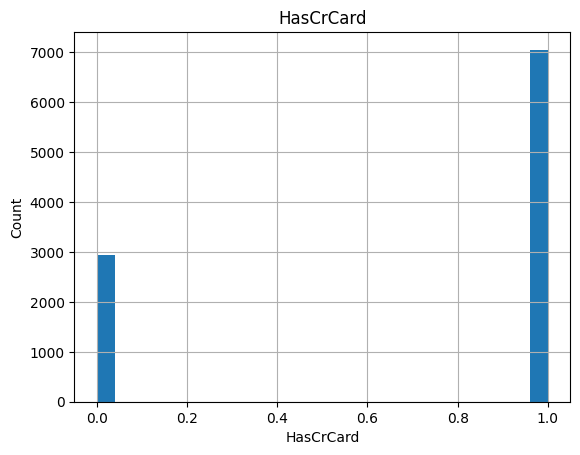

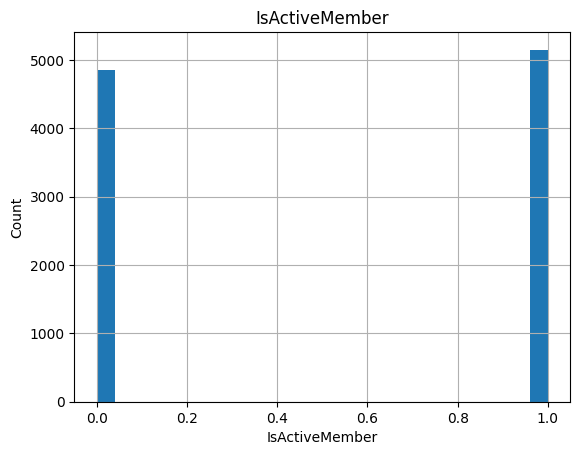

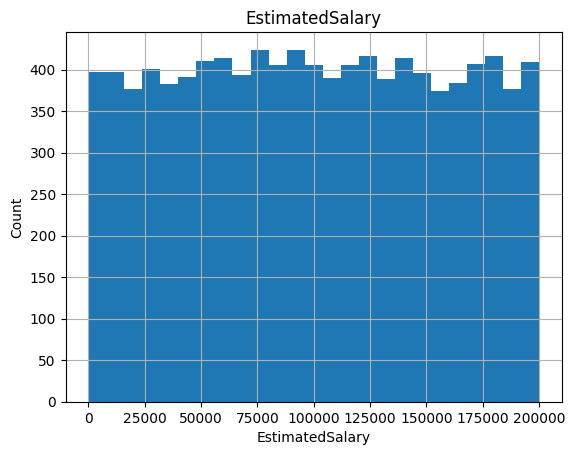

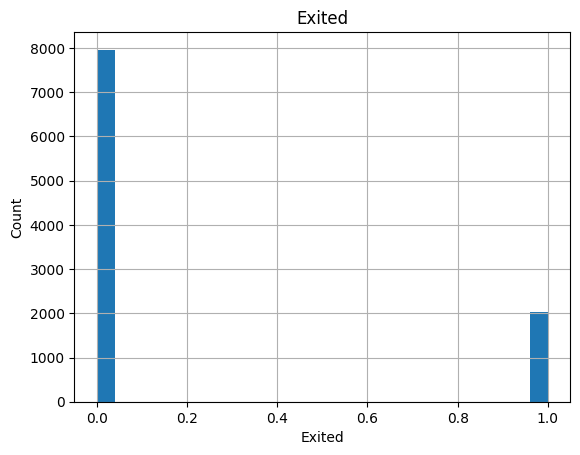

In [92]:
# Compare different classes in the dataset
for feature in df.columns:
    df[feature].hist(bins=25)
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()
# # Box plot to find the outliers in data

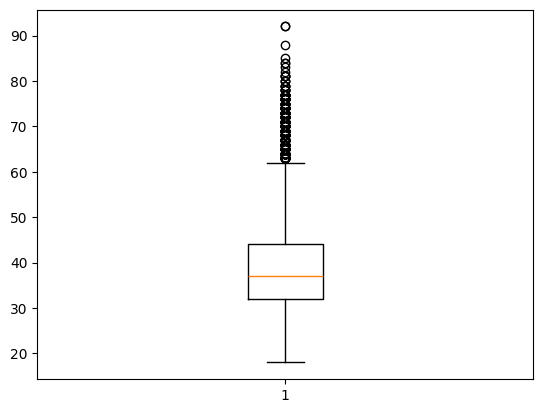

In [93]:
plt.boxplot(df['Age'])
plt.show()

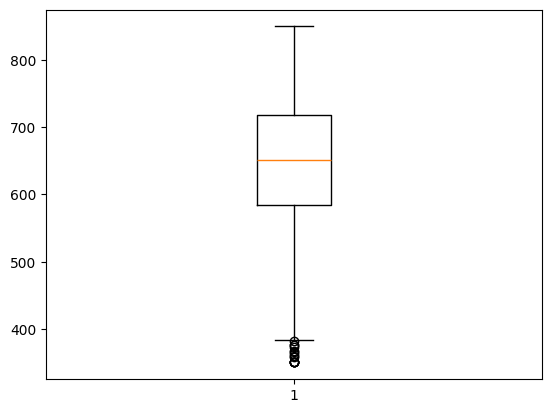

In [94]:
plt.boxplot(df['CreditScore'])
plt.show()

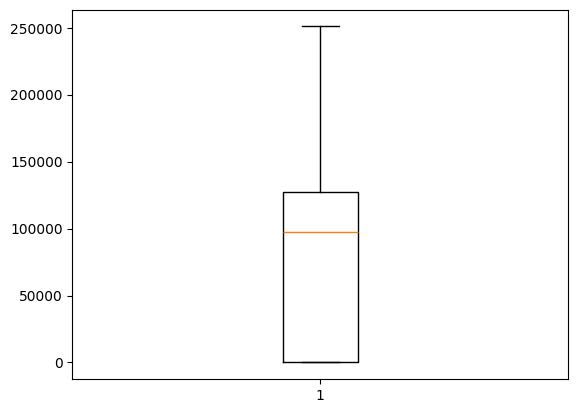

In [95]:
plt.boxplot(df['Balance'])
plt.show()

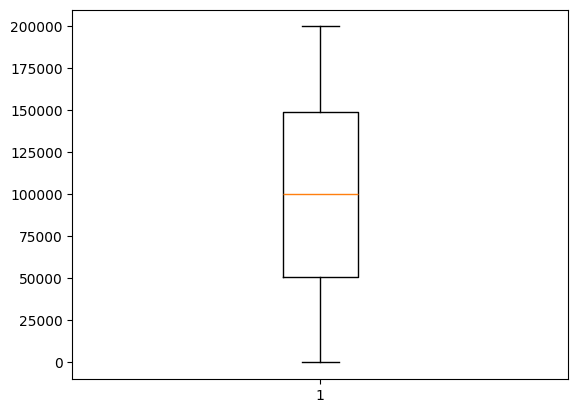

In [96]:
plt.boxplot(df['EstimatedSalary'])
plt.show()
# # Distribution of data

(11.58, 240070.36122541167)

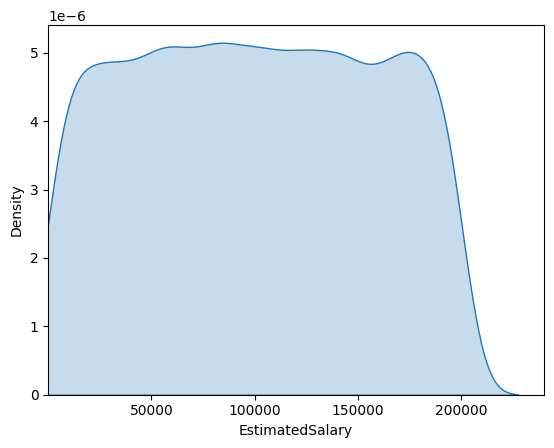

In [97]:
sns.kdeplot(data=df,x='EstimatedSalary',fill=True)
plt.xlim(df['EstimatedSalary'].min())

<Axes: xlabel='Age', ylabel='Density'>

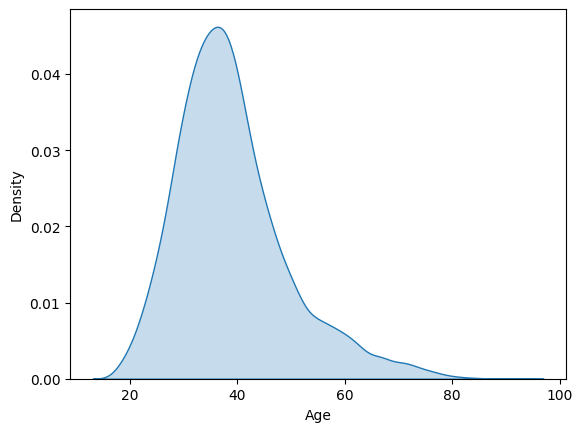

In [98]:
sns.kdeplot(data=df,x='Age',fill=True)
#plt.xlim(df['EstimatedSalary'].min())

<Axes: xlabel='CreditScore', ylabel='Density'>

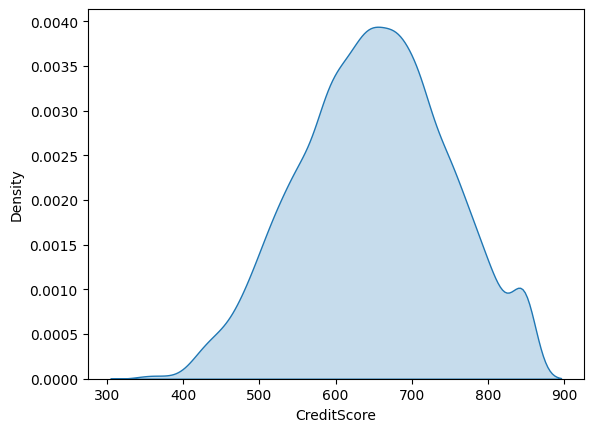

In [99]:
sns.kdeplot(data=df,x='CreditScore',fill=True)

<Axes: xlabel='Balance', ylabel='Density'>

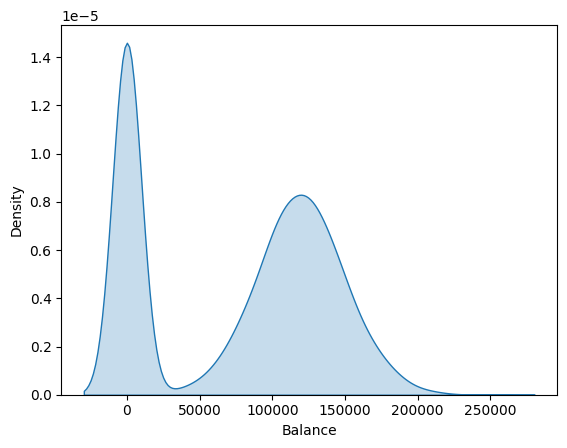

In [100]:
sns.kdeplot(data=df,x='Balance',fill=True)

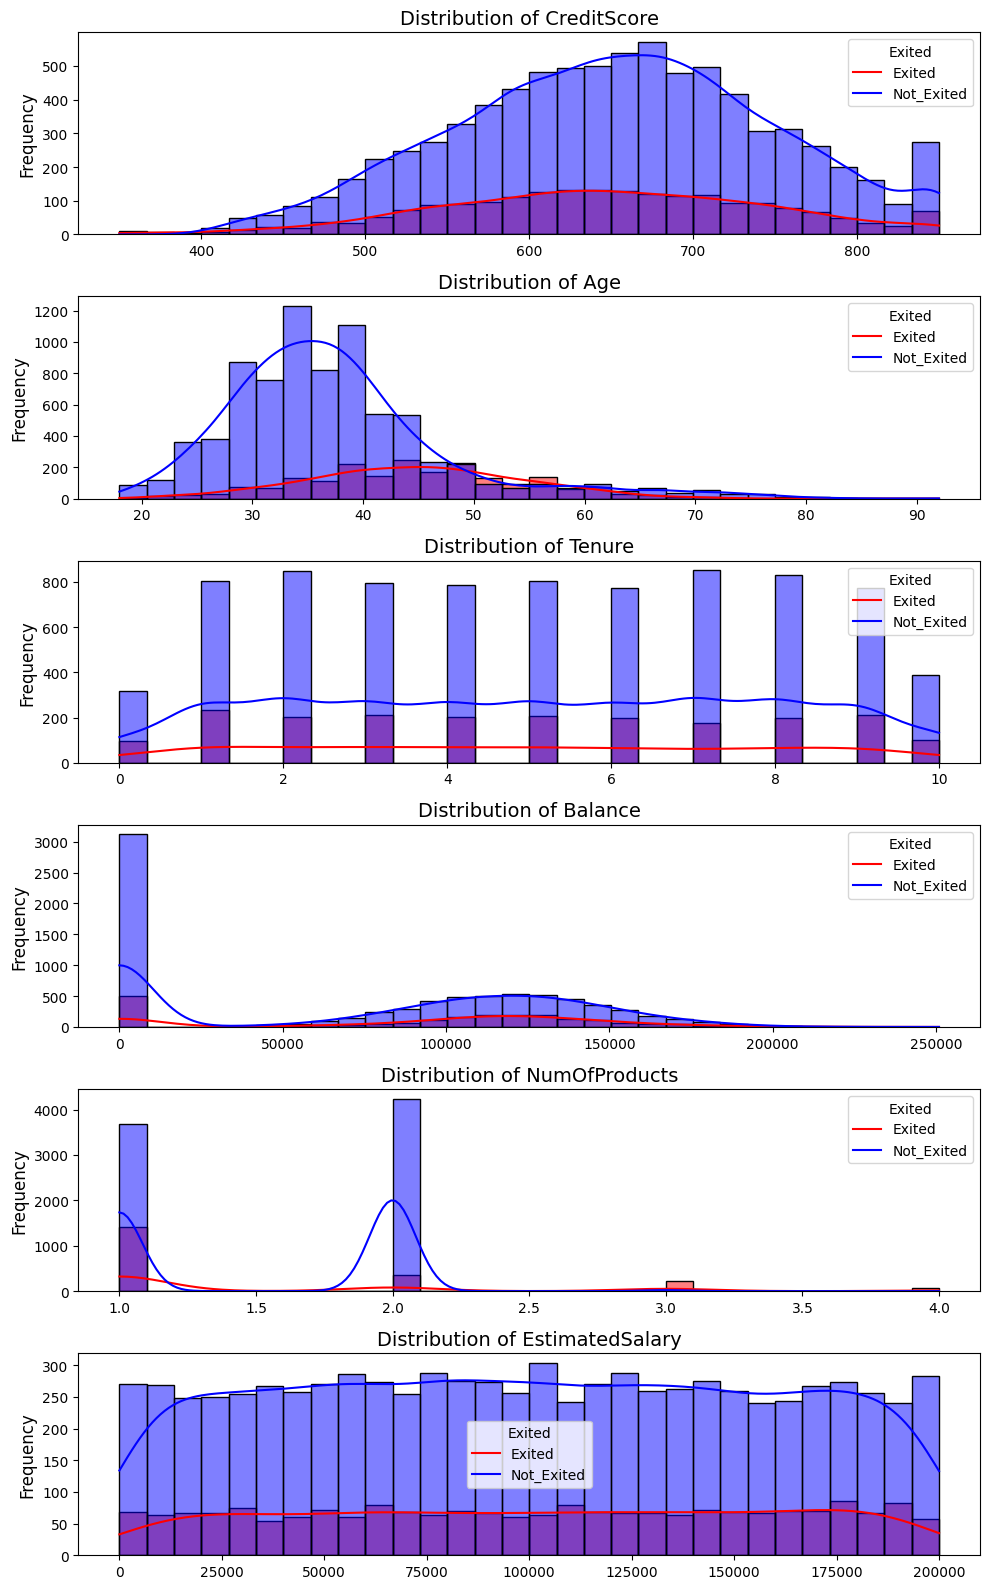

In [101]:
# List of numeric variables
numeric_variables = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Set up subplots
fig, axes = plt.subplots(nrows=len(numeric_variables), ncols=1, figsize=(10, 16))

# Color palette for 'Exited' category (0: Not exited, 1: Exited)
colors = {0: 'blue', 1: 'red'}

# Plot histograms for each numeric variable
for i, var in enumerate(numeric_variables):
    sns.histplot(df, x=var, hue='Exited', ax=axes[i], kde=True, bins=30, palette=colors)
    axes[i].set_title(f'Distribution of {var}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency', fontsize=12)
    axes[i].legend(title='Exited', labels=['Exited', 'Not_Exited'])

plt.tight_layout()
plt.show()

In [102]:
#No of customer churned in age between 48 to 68
df[(df['Age']>47) & (df['Age']<59)&(df['Exited']==1)].shape

(612, 11)

In [103]:
#No of customer retained in age between 48 to 68
df[(df['Age']>47) & (df['Age']<59)&(df['Exited']==0)].shape

(510, 11)

In [104]:
#No of customer in age between 48 to 68
df_age=df[(df['Age']>47) & (df['Age']<59)]

<Axes: >

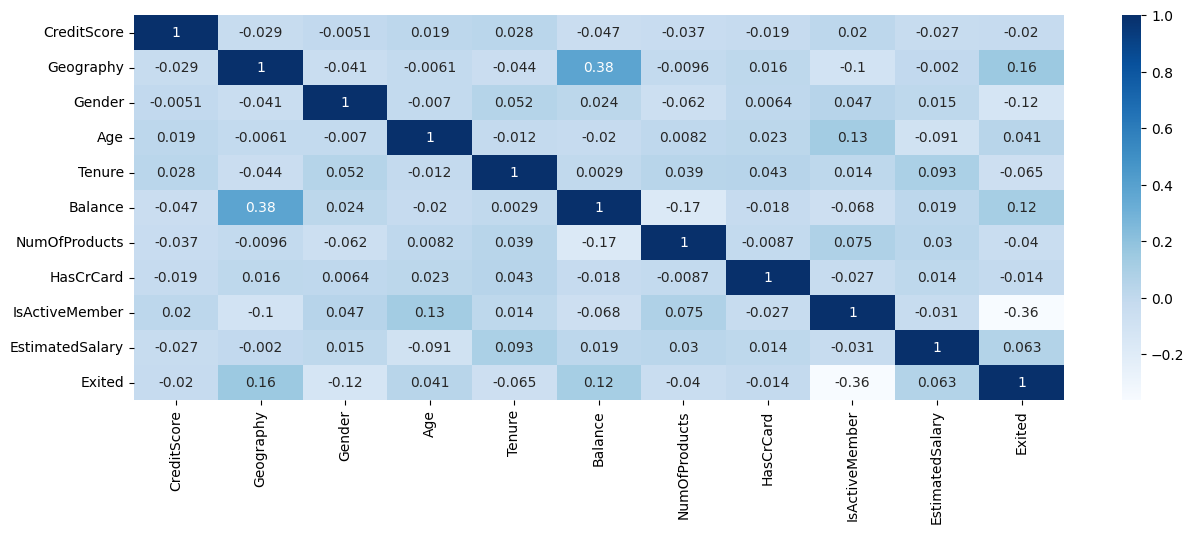

In [105]:
#Correlation among feature of people age between 48 to 58
fig = plt.figure(figsize=(15,5))
sns.heatmap(df_age.corr(),annot=True,cmap="Blues")

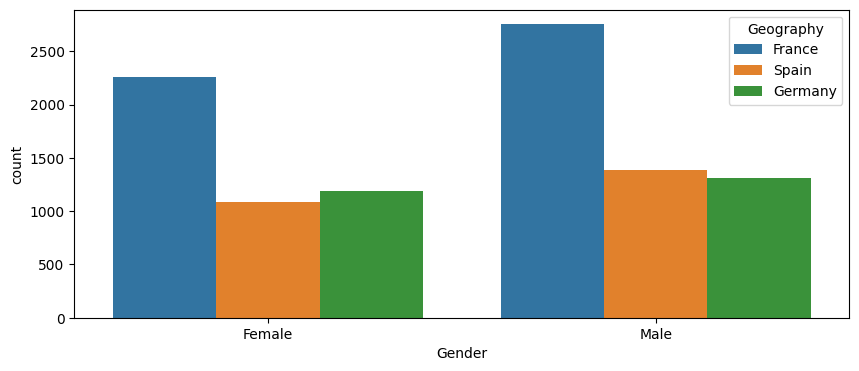

In [106]:
fig=plt.figure(figsize=(10,4))
sns.countplot(data=df_org,x='Gender',hue='Geography')
plt.show()

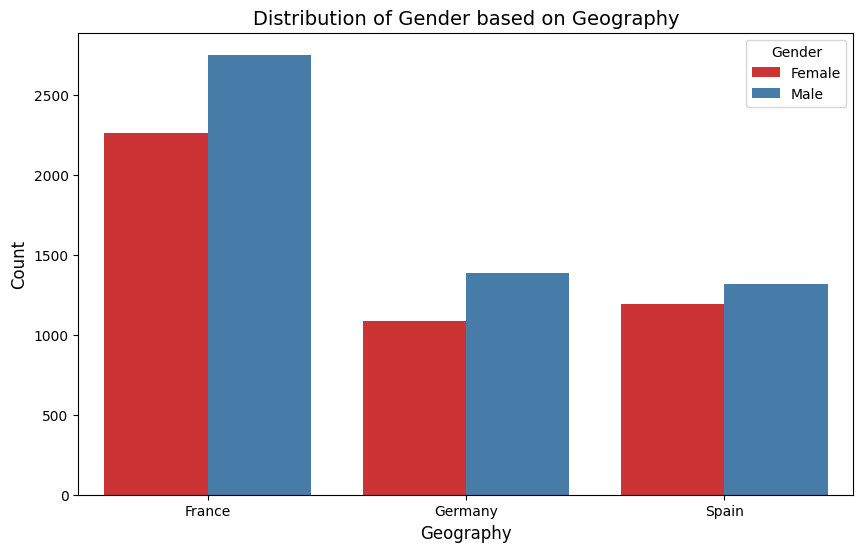

In [107]:
plt.figure(figsize=(10, 6))
# Countplot with stacked bars for Gender based on Geography
sns.countplot(data=df, x='Geography', hue='Gender', palette='Set1')
# Adding title and labels
plt.title('Distribution of Gender based on Geography', fontsize=14)
plt.xlabel('Geography', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1, 2], ['France', 'Germany', 'Spain'])
# Adding legend
plt.legend(title='Gender', labels=['Female', 'Male'])
# ShowÂ plot
plt.show()
# # Outliers with the help of Z-score

In [108]:
outliers=[]
def det_otl(data):
    threshold=3
    mean=data.mean()
    std=data.std()
    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers
outl=det_otl(df['Age'])
print(min(outl),len(outl))

71 133


In [109]:
#Code to fing Q1 and Q3
qun1,qun3=np.percentile(df['Age'],[25,75])
print(qun1,qun3)

32.0 44.0


In [110]:
df['Age'].mean()
# # Outlier by using IQR

np.float64(38.9218)

In [111]:
iqr_value=qun3-qun1
print(iqr_value)

12.0


In [112]:
#Find lower and upper bound
lower_bound=qun1-(1.5*iqr_value)
upper_bound=qun3+(1.5*iqr_value)
print(lower_bound,upper_bound)

14.0 62.0


In [113]:
#No. of outliers by using IQR
df[df['Age']>57].shape

(655, 11)

In [114]:
#No. of outliers by using Z-score
df[df['Age']>65].shape
# # One Hot-encoding

(264, 11)

In [115]:
#Finding Categorical features in dataframe
crt_ft=[ft for ft in df_org.columns if df_org[ft].dtypes=='O']
print(crt_ft)

['Geography', 'Gender']


In [116]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
print(df_org)
encoder = OneHotEncoder(sparse_output=False)  # Ensure the output is a dense array
crt_ft = ['Geography', 'Gender']
encoded_features = encoder.fit_transform(df_org[crt_ft])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(crt_ft))
df_org= pd.concat([df_org, encoded_df], axis=1)
df_org.drop(crt_ft, axis=1, inplace=True)

      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0   

In [117]:
df_org.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0,1.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0,1.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0,1.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0,1.0,0.0


In [118]:
df_org.isnull().values.any()

np.False_

In [119]:
#Define x and y variables
x = df_org.drop('Exited',axis=1).to_numpy()
y = df_org['Exited'].to_numpy()
#Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=100)
#Fix the imbalanced Classes
from imblearn.over_sampling import SMOTE
smt=SMOTE(random_state=100)
x_train_smt,y_train_smt = smt.fit_resample(x_train,y_train)

In [120]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train_smt)
x_test2 = sc.transform(x_test)

In [121]:
print(x_test2.shape)

(2000, 13)


In [122]:
#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train_smt)
x_test2 = sc.transform(x_test)

In [123]:
#Class Balance - Test Data
print('Train Data - Class Split')
num_zeros = (y_train_smt == 0).sum()
num_ones = (y_train_smt == 1).sum()
print('Class 0 -',  num_zeros)
print('Class 1 -',  num_ones)

Train Data - Class Split
Class 0 - 6370
Class 1 - 6370


In [124]:
#Logistic Base Model
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.linear_model import LogisticRegression
method = LogisticRegression(solver='lbfgs',
                            class_weight='balanced',
                            random_state=100)
method.fit(x_train2, y_train_smt)
predict = method.predict(x_test2)
print('\nEstimator: Logistic Regression') 
print(confusion_matrix(y_test, predict))  
print(classification_report(y_test, predict))


Estimator: Logistic Regression
[[1162  431]
 [ 133  274]]
              precision    recall  f1-score   support

           0       0.90      0.73      0.80      1593
           1       0.39      0.67      0.49       407

    accuracy                           0.72      2000
   macro avg       0.64      0.70      0.65      2000
weighted avg       0.79      0.72      0.74      2000



In [125]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.linear_model import LogisticRegression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1',None]  # Regularization penalty
}
method = LogisticRegression(class_weight='balanced', random_state=100)
grid_search = GridSearchCV(estimator=method, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train2, y_train_smt)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_method = LogisticRegression(**best_params, class_weight='balanced', random_state=100)
best_method.fit(x_train2, y_train_smt)
predict = best_method.predict(x_test2)
# Print confusion matrix and classification report
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, predict))  
print('\nClassification Report:')
print(classification_report(y_test, predict))

c:\Users\ASUS\OneDrive\Desktop\Explorer\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\ASUS\OneDrive\Desktop\Explorer\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\ASUS\OneDrive\Desktop\Explorer\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\ASUS\OneDrive\Desktop\Explorer\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\ASUS\OneDrive\Desktop\Explorer\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\ASUS\O

Best Parameters: {'C': 0.01, 'penalty': None}

Confusion Matrix:
[[1162  431]
 [ 133  274]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.73      0.80      1593
           1       0.39      0.67      0.49       407

    accuracy                           0.72      2000
   macro avg       0.64      0.70      0.65      2000
weighted avg       0.79      0.72      0.74      2000



c:\Users\ASUS\OneDrive\Desktop\Explorer\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\ASUS\OneDrive\Desktop\Explorer\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\ASUS\OneDrive\Desktop\Explorer\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\ASUS\OneDrive\Desktop\Explorer\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\ASUS\OneDrive\Desktop\Explorer\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\ASUS\O

In [126]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.ensemble import RandomForestClassifier
# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=100)
# Train the base model
rf_model.fit(x_train2, y_train_smt)
# Make predictions
predict_base = rf_model.predict(x_test2)
# Print confusion matrix and classification report for the base model
print("Base Random Forest Model:")
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, predict_base))  
print('\nClassification Report:')
print(classification_report(y_test, predict_base))

Base Random Forest Model:

Confusion Matrix:
[[1508   85]
 [ 218  189]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1593
           1       0.69      0.46      0.56       407

    accuracy                           0.85      2000
   macro avg       0.78      0.71      0.73      2000
weighted avg       0.84      0.85      0.84      2000



In [127]:
# Define the parameter grid for GridSearchCV
param_grid={
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['log2', 'sqrt'],  # Number of features to consider when looking for the best split
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy',verbose=True,n_jobs=-1)
grid_search.fit(x_train2, y_train_smt)
best_params = grid_search.best_params_
# best_params={'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
print("\nBest Parameters:", best_params)
# Train the model with the best parameters
best_rf_model = RandomForestClassifier(**best_params, random_state=100)
best_rf_model.fit(x_train2, y_train_smt)
predict_optimized = best_rf_model.predict(x_test2)
# Print confusion matrix and classification report for the optimized model
print("\nOptimized Random Forest Model:")
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, predict_optimized))  
print('\nClassification Report:')
print(classification_report(y_test, predict_optimized))

Fitting 5 folds for each of 162 candidates, totalling 810 fits

Best Parameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Optimized Random Forest Model:

Confusion Matrix:
[[1507   86]
 [ 213  194]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1593
           1       0.69      0.48      0.56       407

    accuracy                           0.85      2000
   macro avg       0.78      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



In [128]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [10, 50],  # Number of trees in the forest
    'max_depth': [None, 10],  # Maximum depth of the tree
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],  # Minimum number of samples required to be at a leaf node
    'max_features': ['log2', 'sqrt'],  # Number of features to consider when looking for the best split
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy',n_jobs=-1,verbose=True)
grid_search.fit(x_train2, y_train_smt)
best_params = grid_search.best_params_
# best_params={'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
print("\nBest Parameters:", best_params)
# Train the model with the best parameters
best_rf_model = RandomForestClassifier(**best_params, random_state=100)
best_rf_model.fit(x_train2, y_train_smt)
predict_optimized = best_rf_model.predict(x_test2)
# Print confusion matrix and classification report for the optimized model
print("\nOptimized Random Forest Model:")
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, predict_optimized))  
print('\nClassification Report:')
print(classification_report(y_test, predict_optimized))
# %%

Fitting 5 folds for each of 32 candidates, totalling 160 fits


c:\Users\ASUS\OneDrive\Desktop\Explorer\myenv\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}

Optimized Random Forest Model:

Confusion Matrix:
[[1509   84]
 [ 212  195]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1593
           1       0.70      0.48      0.57       407

    accuracy                           0.85      2000
   macro avg       0.79      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



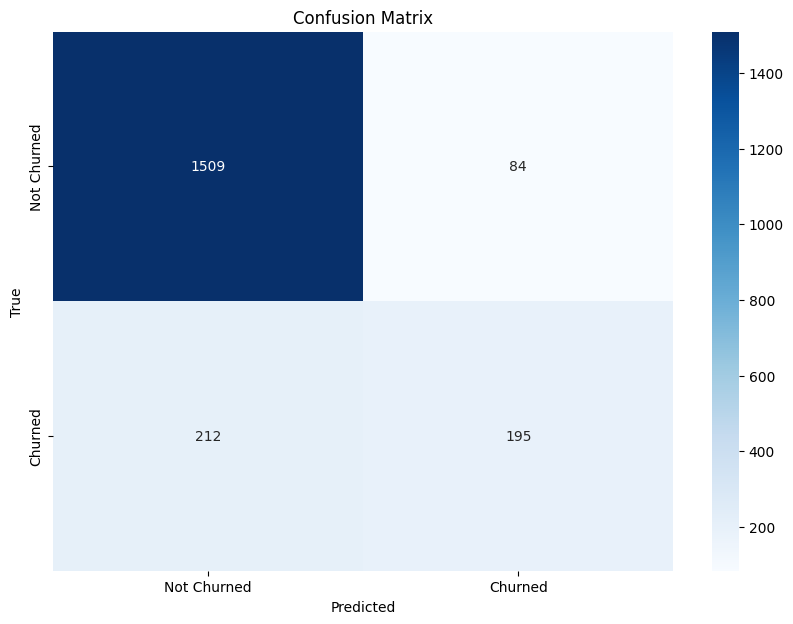

In [129]:
cm=confusion_matrix(y_test, predict_optimized)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()

In [130]:
import pickle as pkl
with open('models/encoder.pkl','wb') as file:
    pkl.dump(encoder,file)
with open('models/scaler.pkl','wb') as file:
    pkl.dump(sc,file)
with open('models/rf_model.pkl','wb') as file:
    pkl.dump(best_rf_model,file)